In [1]:
# Load the dataset
import pandas as pd

df = pd.read_csv("bank customer churn.csv")

# Display basic information about the dataset
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### DataSet Overview

Total Rows: 10,000    
Total Columns: 18    
Target Variable: Exited (1 = Churned, 0 = Retained)

Feature Types: 

Numerical Features: CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Complain, Satisfaction Score, Point Earned    
Categorical Features: Geography, Gender, Card Type    
Irrelevant Columns: RowNumber, CustomerId, Surname (These are identifiers and should be dropped)    

#### Checking for Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display missing values count
missing_values

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
## No missing values were found in the dataset, so we don’t need any imputation.

#### Exploring the Target Variable (Churn Analysis)

C:\Users\zuhairi\AppData\Local\Temp\ipykernel_26812\2181026667.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Exited"], palette="coolwarm")


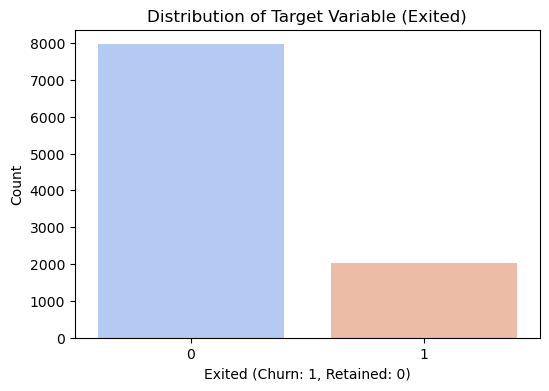

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Exited"], palette="coolwarm")
plt.title("Distribution of Target Variable (Exited)")
plt.xlabel("Exited (Churn: 1, Retained: 0)")
plt.ylabel("Count")
plt.show()

# Calculate percentage of each class
churn_rate = df["Exited"].value_counts(normalize=True) * 100
churn_rate


#### Exploring the Target Variable
Churn Rate (Exited = 1): 20.38%      
Retention Rate (Exited = 0): 79.62%          
Observation: There is a class imbalance (churned customers are significantly fewer). We may need oversampling (SMOTE) or undersampling during model training.  

#### Exploratory Data Analysis (EDA)

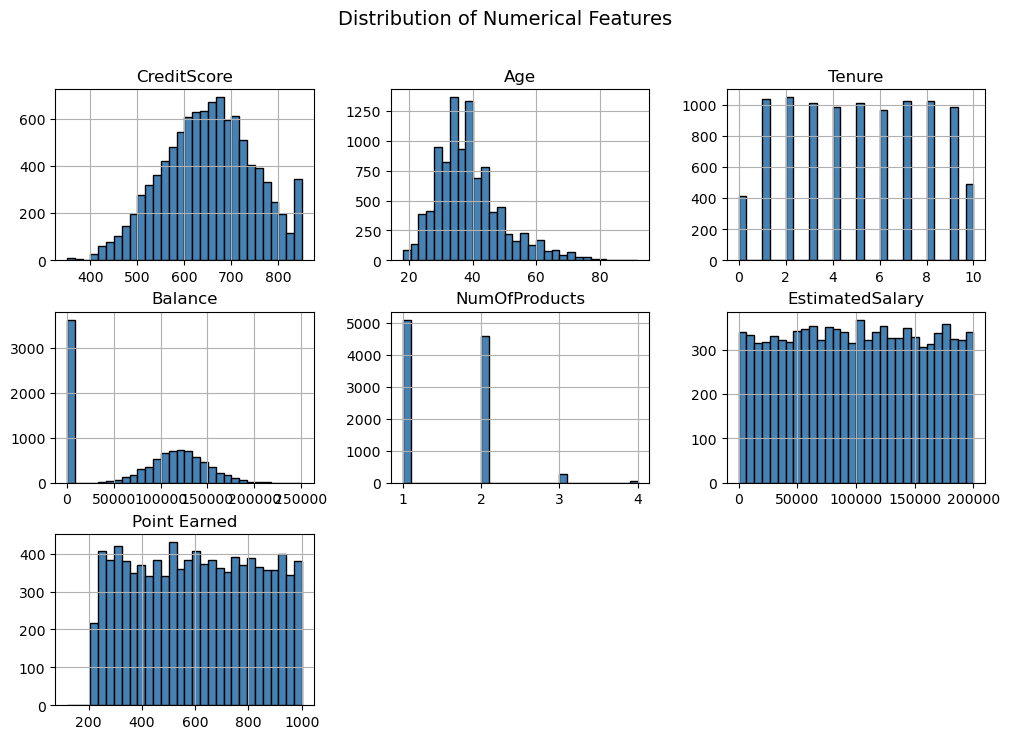

In [11]:
# Plot distribution of numerical features
df_numeric = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']]

df_numeric.hist(figsize=(12, 8), bins=30, color='steelblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

#### Key Observations from Feature Distributions:

Age: Right-skewed, with most customers between 20-50 years.        
Balance: A significant portion of customers have a zero balance, which might indicate inactive accounts.              
Credit Score: Normally distributed between 350 to 850.          
Estimated Salary: Uniformly distributed, suggesting no clear segmentation.             
Number of Products: Majority of customers have 1 or 2 products.             

#### feature correlations using a heatmap

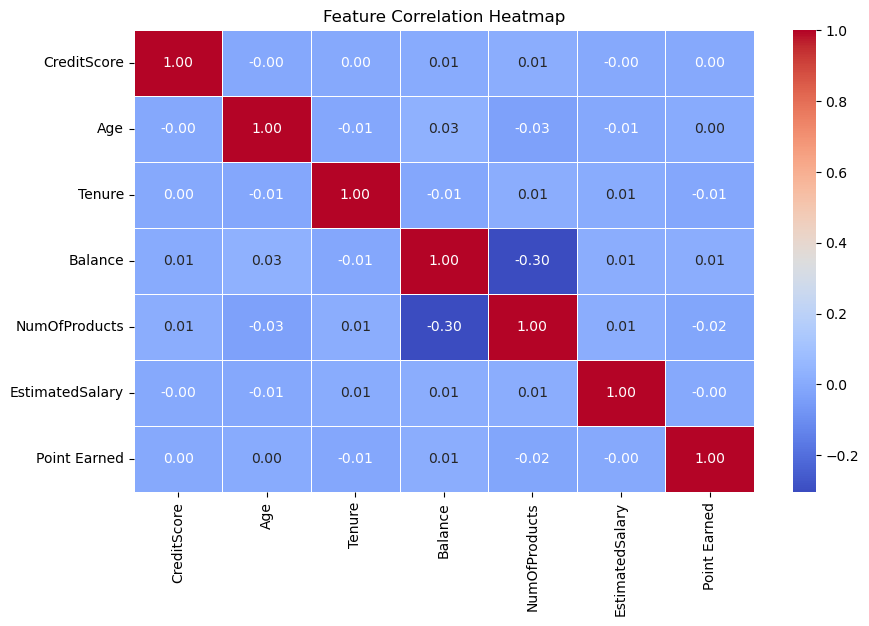

In [14]:
# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


#### Correlation Analysis

In [16]:
### Age has a positive correlation with Churn (Exited). Older customers are more likely to leave.
### Being an active member (IsActiveMember) is negatively correlated with Churn. Active members tend to stay.
### Higher number of products (NumOfProducts) shows a weak correlation with Churn.
### Balance has no strong correlation with Churn, but we noticed many zero balances earlier, which might need further exploration.

#### Feature Selection Using Hypothesis Testing

##### Chi-Square test (for categorical features)
##### T-test (for continuous features)
to identify which features significantly affect churn

In [18]:
from scipy.stats import chi2_contingency, ttest_ind

significance_level = 0.05  # 5% threshold

# Categorical Features for Chi-Square Test
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']
chi_square_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p

# Convert to DataFrame
chi_square_df = pd.DataFrame(list(chi_square_results.items()), columns=['Feature', 'P-Value'])
chi_square_df['Significant'] = chi_square_df['P-Value'] < significance_level

# Numerical Features for T-Test
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
t_test_results = {}

for col in numerical_features:
    class_0 = df[df['Exited'] == 0][col]  # Non-churned
    class_1 = df[df['Exited'] == 1][col]  # Churned
    
    t_stat, p_value = ttest_ind(class_0, class_1, equal_var=False)  # Welch's T-test
    t_test_results[col] = p_value

# Convert to DataFrame
t_test_df = pd.DataFrame(list(t_test_results.items()), columns=['Feature', 'P-Value'])
t_test_df['Significant'] = t_test_df['P-Value'] < significance_level

display(chi_square_df)  # Show results of the Chi-Square Test
display(t_test_df)  # Show results of the T-Test





,Feature,P-Value,Significant
0,Geography,5.245736e-66,True
1,Gender,2.925368e-26,True
2,HasCrCard,5.026182e-01,False
3,IsActiveMember,6.153167e-55,True
4,Complain,0.000000e+00,True
5,Card Type,1.679411e-01,False


,Feature,P-Value,Significant
0,CreditScore,9.284913e-03,True
1,Age,4.399452e-179,True
2,Tenure,1.771113e-01,False
3,Balance,5.817634e-35,True
4,EstimatedSalary,2.142820e-01,False
5,Point Earned,6.428802e-01,False


#### Handling Imbalance Class

In [20]:
# Handling Class Imbalance using SMOTE (Oversampling the minority class)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Drop irrelevant columns
df_cleaned = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])  

# Convert categorical variables into dummy variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

# Split features and target variable
X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

# Split into train-test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
class_distribution = y_train_resampled.value_counts(normalize=True) * 100
class_distribution


Exited
0    50.0
1    50.0
Name: proportion, dtype: float64

#### Train and Evaluate Models

In [22]:
pip install xgboost scikit-learn imbalanced-learn


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale features (Logistic Regression requires feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with increased iterations
logistic_model = LogisticRegression(max_iter=500)  # Increase iterations
logistic_model.fit(X_train_scaled, y_train_resampled)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test_scaled)


In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)  # Remove use_label_encoder
xgb_model.fit(X_train_resampled, y_train_resampled)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC()
}

# Train and evaluate models
results = []

for name, model in models.items():
    # Train the model on SMOTE-resampled data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert results into a DataFrame and display
results_df = pd.DataFrame(results)

print("\n✅ Model Performance Metrics:")
print(results_df)


C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\zuhairi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Model Performance Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression    0.7355   0.406202  0.642157  0.497626
1        Decision Tree    0.9970   0.995074  0.990196  0.992629
2        Random Forest    0.9985   0.997543  0.995098  0.996319
3              XGBoost    0.9985   0.997543  0.995098  0.996319
4                  SVM    0.4600   0.235016  0.730392  0.355609


In [26]:
# Best Performing Models:

## Random Forest n XGBoost (both have 99.85% accuracy and high F1-score of 0.996).
## Decision Tree also strong but slightly lower than ensemble methods.

In [48]:
# Import required libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Define parameter grid for Random Forest
rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize and run GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and F1-Score
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

print("Best Parameters for Random Forest:", best_rf_params)
print(f"Best F1-Score for Random Forest: {best_rf_score:.4f}")

# Define parameter grid for XGBoost
xgb_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 6, 10],
    "learning_rate": [0.01, 0.1, 0.2]
}

# Initialize and run GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                               xgb_param_grid, cv=5, scoring='f1', n_jobs=-1)
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and F1-Score
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

print("Best Parameters for XGBoost:", best_xgb_params)
print(f"Best F1-Score for XGBoost: {best_xgb_score:.4f}")


Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best F1-Score for Random Forest: 0.9984


C:\Users\zuhairi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best F1-Score for XGBoost: 0.9989


C:\Users\zuhairi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


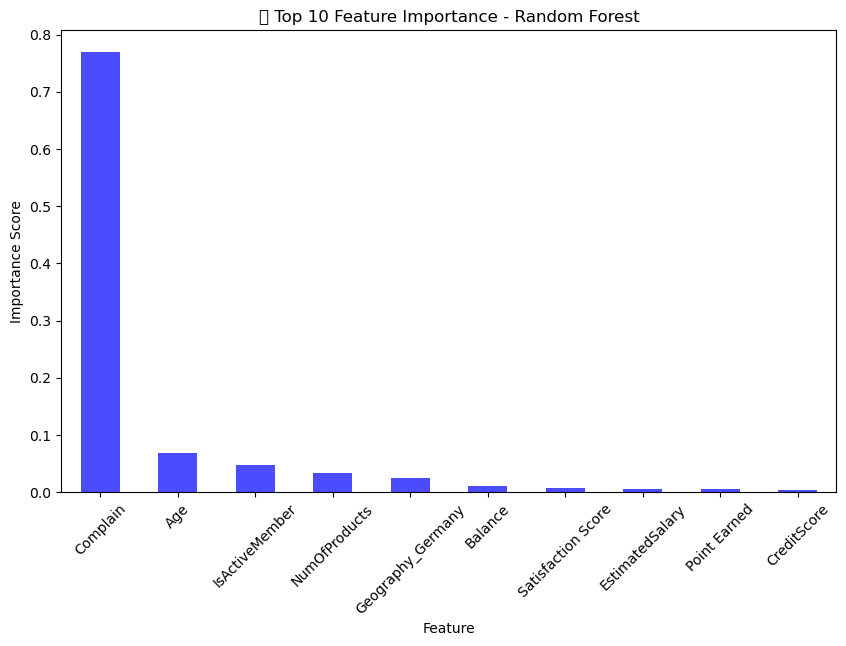

C:\Users\zuhairi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


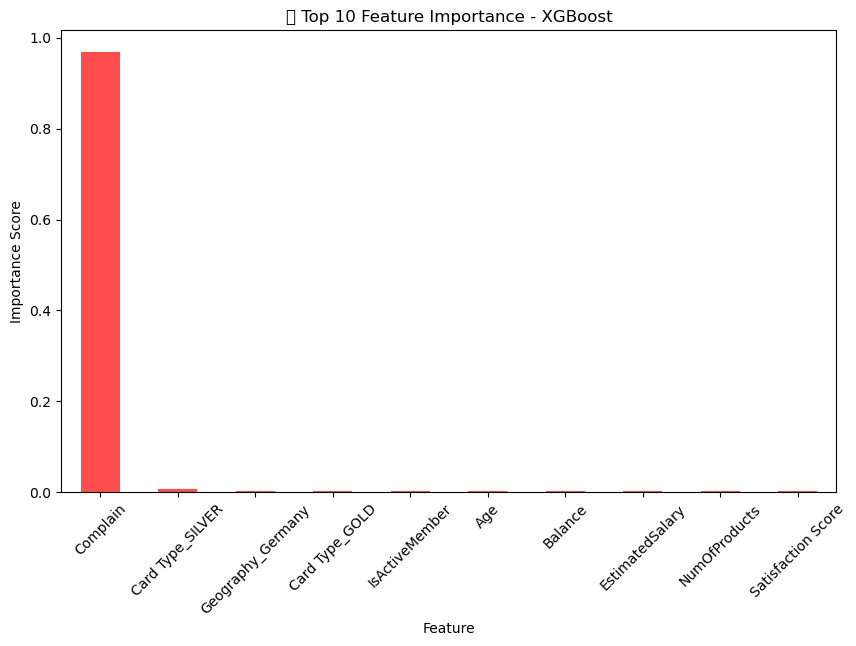

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Train the best Random Forest model with optimized parameters
best_rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)

# Train the best XGBoost model with optimized parameters
best_xgb = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled)

# Extract feature importance
rf_feature_importances = pd.Series(best_rf.feature_importances_, index=X_train_resampled.columns)
xgb_feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train_resampled.columns)

# Sort by importance
rf_feature_importances = rf_feature_importances.sort_values(ascending=False)
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False)

# Plot Feature Importance - Random Forest
plt.figure(figsize=(10,6))
rf_feature_importances.head(10).plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

# Plot Feature Importance - XGBoost
plt.figure(figsize=(10,6))
xgb_feature_importances.head(10).plot(kind='bar', color='red', alpha=0.7)
plt.title("Top 10 Feature Importance - XGBoost")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()
